# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [85]:
# #lets take a look
# test_url = (f"http://api.openweathermap.org/data/2.5/weather?q={cities[1]}&units=imperial&appid={weather_api_key}")
# response =requests.get(test_url)
# chi = response.json()
# city = cities[1]
# lat = chi['coord']['lat']
# lon = chi['coord']['lon']
# temp = chi['main']['temp_max']
# humidity = chi['main']['humidity']
# clouds = chi['clouds']['all']
# windsp = chi['wind']['speed']
# country = chi['sys']['country']
# date = chi['dt']
# response

In [20]:
#using current weather API
town = []
lat = []
lon = []
temp = []
humidity = []
clouds = []
windsp = []
country = []
date = []

processing_counter = 1
set_counter = 1
print("Beginning Data Retrieval")
print("-------------------------------")
for city in cities:
    url = (f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}")
    try:
        response = requests.get(url)
        all_city_data = response.json()
        town.append(all_city_data['name'])
        lat.append(all_city_data['coord']['lat'])
        lon.append(all_city_data['coord']['lon'])
        temp.append(all_city_data['main']['temp_max'])
        humidity.append(all_city_data['main']['humidity'])
        clouds.append(all_city_data['clouds']['all'])
        windsp.append(all_city_data['wind']['speed'])
        country.append(all_city_data['sys']['country'])
        date.append(all_city_data['dt'])
        print(f"Processing Record {processing_counter} of Set {set_counter} | {city}")
        
        processing_counter += 1
        if processing_counter == 50:
            set_counter += 1
        if processing_counter > 50:
            processing_counter = 1

    except:
        print("City not found. Skipping...") 
    continue
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | santa fe
Processing Record 5 of Set 1 | sakakah
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | khartoum
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | codrington
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | tezu
Processing Record 17 of Set 1 | marzuq
Processing Record 18 of Set 1 | la ronge
City not found. Skipping...
Processing Record 19 of Set 1 | severo-kurilsk
City not found. Skipping...
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | p

Processing Record 37 of Set 4 | honningsvag
Processing Record 38 of Set 4 | mantua
Processing Record 39 of Set 4 | darhan
City not found. Skipping...
Processing Record 40 of Set 4 | arraial do cabo
Processing Record 41 of Set 4 | constitucion
Processing Record 42 of Set 4 | caravelas
Processing Record 43 of Set 4 | baena
Processing Record 44 of Set 4 | davila
Processing Record 45 of Set 4 | udimskiy
Processing Record 46 of Set 4 | butaritari
Processing Record 47 of Set 4 | beitbridge
Processing Record 48 of Set 4 | hithadhoo
Processing Record 49 of Set 4 | saint anthony
Processing Record 50 of Set 5 | ferkessedougou
Processing Record 1 of Set 5 | bathsheba
Processing Record 2 of Set 5 | fecamp
Processing Record 3 of Set 5 | richards bay
Processing Record 4 of Set 5 | grand gaube
Processing Record 5 of Set 5 | najran
City not found. Skipping...
Processing Record 6 of Set 5 | mana
Processing Record 7 of Set 5 | bethel
Processing Record 8 of Set 5 | nizwa
Processing Record 9 of Set 5 | pa

Processing Record 28 of Set 8 | clyde river
City not found. Skipping...
Processing Record 29 of Set 8 | opuwo
Processing Record 30 of Set 8 | bengkulu
Processing Record 31 of Set 8 | baoqing
Processing Record 32 of Set 8 | punta alta
Processing Record 33 of Set 8 | sayyan
Processing Record 34 of Set 8 | morehead
Processing Record 35 of Set 8 | college
Processing Record 36 of Set 8 | shimoda
Processing Record 37 of Set 8 | sing buri
Processing Record 38 of Set 8 | houston
Processing Record 39 of Set 8 | rocha
Processing Record 40 of Set 8 | port lincoln
Processing Record 41 of Set 8 | engel-yurt
Processing Record 42 of Set 8 | san lazaro
Processing Record 43 of Set 8 | gamboma
Processing Record 44 of Set 8 | dunedin
Processing Record 45 of Set 8 | talavera
Processing Record 46 of Set 8 | lardos
Processing Record 47 of Set 8 | ixtapa
Processing Record 48 of Set 8 | tecoanapa
Processing Record 49 of Set 8 | yaan
Processing Record 50 of Set 9 | huntsville
Processing Record 1 of Set 9 | arr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
all_city_df = pd.DataFrame({  
    "City": town,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": windsp,
    "Country": country,
    "Date": date
})
all_city_df.to_csv("all_data.csv")
all_city_df.count()

City          549
Latitude      549
Longitude     549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [24]:
all_city_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,48.00,84,97,5.99,ZA,1597541995
1,Mataura,-46.19,168.86,51.01,70,12,5.01,NZ,1597541995
2,Saint-Philippe,-21.36,55.77,64.40,59,82,3.36,RE,1597541835
3,Santa Fe,-31.63,-60.70,55.00,34,0,4.00,AR,1597541996
4,Sakakah,29.97,40.21,80.60,32,0,5.82,SA,1597541996
...,...,...,...,...,...,...,...,...,...
544,Aksu,41.12,80.26,78.55,28,0,5.12,CN,1597542078
545,Changtu,42.78,124.10,81.95,63,33,1.54,CN,1597541886
546,Sioux Lookout,50.10,-91.92,64.40,68,75,4.70,CA,1597542078
547,Waiouru,-39.48,175.67,49.12,47,0,4.03,NZ,1597542079


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
all_city_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,20.536976,16.688397,68.628434,70.972678,46.460838,7.840291,1.597542e+09
std,32.886902,88.571696,14.066597,19.789983,39.327476,5.454757,7.221698e+01
min,-54.800000,-175.200000,32.000000,3.000000,0.000000,0.340000,1.597542e+09
25%,-5.840000,-60.630000,57.990000,60.000000,1.000000,3.940000,1.597542e+09
50%,26.590000,18.700000,71.010000,75.000000,40.000000,6.690000,1.597542e+09
75%,46.620000,92.800000,79.720000,87.000000,90.000000,10.290000,1.597542e+09
max,78.220000,179.320000,108.000000,100.000000,100.000000,33.910000,1.597542e+09


In [31]:
#  Get the indices of cities that have humidity over 100%.
humidity100 = all_city_df.loc[all_city_df["Humidity"]>100, :]
humidity100

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#skipping this step as no cities are > 100 percent humidity

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

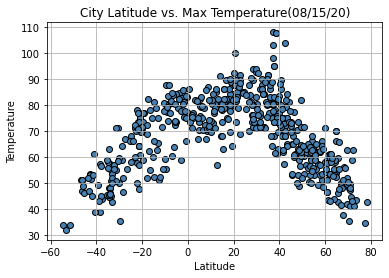

In [50]:
plt.scatter(all_city_df["Latitude"],all_city_df["Max Temp"], marker="o", color="steelblue", edgecolor="black")
plt.title("City Latitude vs. Max Temperature(08/15/20)")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid()

In [ ]:
#plot showing the max temperatures of cities vs latitude. The plot suggests that max temperatures increase toward the 
#equator (lat=0) but may actually be warmer at latitudes bewteen 20 and 40 degrees

## Latitude vs. Humidity Plot

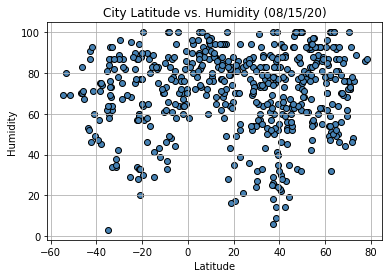

In [51]:
plt.scatter(all_city_df["Latitude"],all_city_df["Humidity"], marker="o", color="steelblue", edgecolor="black")
plt.title("City Latitude vs. Humidity (08/15/20)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()

In [ ]:
#plot showing the humidity of cities vs latitude. The plot shows little correlation between humidity and latitude
#The plot also may show that that humidity percentages over 60 are more common

## Latitude vs. Cloudiness Plot

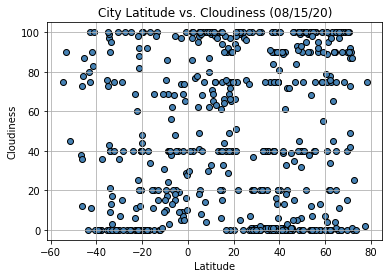

In [53]:
plt.scatter(all_city_df["Latitude"],all_city_df["Cloudiness"], marker="o", color="steelblue", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (08/15/20)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()

In [ ]:
#plot showing the cloudiness of cities vs latitude.The plot shows little correlation between cloudiness and latitude

## Latitude vs. Wind Speed Plot

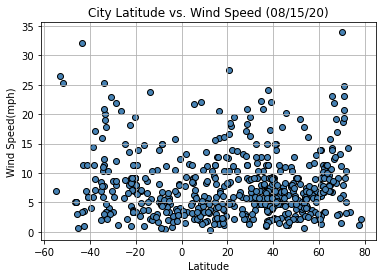

In [54]:
plt.scatter(all_city_df["Latitude"],all_city_df["Wind Speed"], marker="o", color="steelblue", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (08/15/20)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid()

In [ ]:
#plot showing the Wind Speed in cities vs latitude. The plot shows little correlation between wind speed and latitude
#The plot also may show that that wind speeds less than 10 mph are more common

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plot


In [59]:
# Create Northern and Southern Hemisphere DataFrames
south_hem_df = all_city_df.loc[all_city_df["Latitude"]<0, :]

In [60]:
north_hem_df = all_city_df.loc[all_city_df["Latitude"]>0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R Squared: 0.4822647158108525
y = -0.49x + 89.23


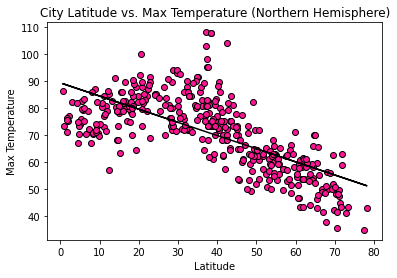

In [68]:
x_values = north_hem_df['Latitude'].astype(float)
y_values = north_hem_df['Max Temp'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, marker="o", color="deeppink", edgecolor="black")
plt.plot(x_values, regress_values, "r-", color="black")
plt.title("City Latitude vs. Max Temperature (Northern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

print(f"R Squared: {rvalue**2}")
print(line_eq)


plt.show()

In [ ]:
#plot showing the linear regression for City Latitude vs. Max Temperature in Northern Hemisphere
# R squared value suggests that there may be a correlation between Max Tempurature and Latitude 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R Squared: 0.6334543732107322
y = 0.8x + 81.58


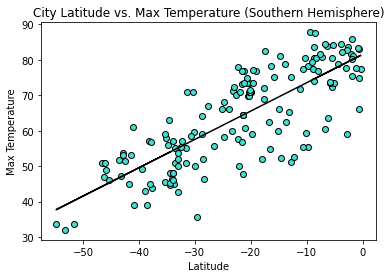

In [76]:
x_values = south_hem_df['Latitude'].astype(float)
y_values = south_hem_df['Max Temp'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, marker="o", color="turquoise", edgecolor="black")
plt.plot(x_values, regress_values, "r-", color="black")
plt.title("City Latitude vs. Max Temperature (Southern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

print(f"R Squared: {rvalue**2}")
print(line_eq)


plt.show()

In [ ]:
#plot showing the linear regression for City Latitude vs. Max Temperature in Southern Hemisphere
# R squared value suggests that there is a correlation between Max Tempurature and Latitude 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Squared: 0.0076230065068077215
y = -0.09x + 75.44


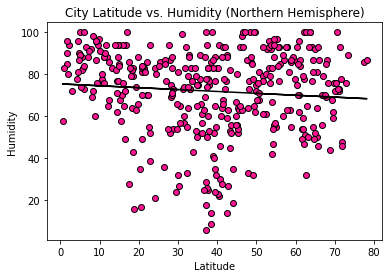

In [77]:
x_values = north_hem_df['Latitude'].astype(float)
y_values = north_hem_df['Humidity'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, marker="o", color="deeppink", edgecolor="black")
plt.plot(x_values, regress_values, "r-", color="black")
plt.title("City Latitude vs. Humidity (Northern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"R Squared: {rvalue**2}")
print(line_eq)


plt.show()

In [ ]:
#plot showing the linear regression for City Latitude vs. Humidity in Northern Hemisphere
# R squared value suggests that there is little to no correlation between Humidity and Latitude 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Squared: 0.003101437335124852
y = 0.08x + 70.17


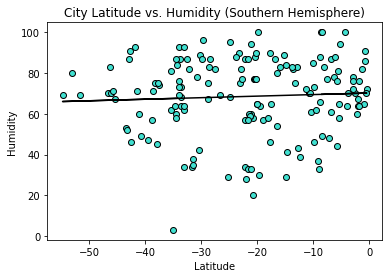

In [78]:
x_values = south_hem_df['Latitude'].astype(float)
y_values = south_hem_df['Humidity'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, marker="o", color="turquoise", edgecolor="black")
plt.plot(x_values, regress_values, "r-", color="black")
plt.title("City Latitude vs. Humidity (Southern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"R Squared: {rvalue**2}")
print(line_eq)


plt.show()

In [ ]:
#plot showing the linear regression for City Latitude vs. Humidity in Southern Hemisphere
# R squared value suggests that there is little to no correlation between Humidity and Latitude 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Squared: 0.005352956335285456
y = -0.15x + 56.14


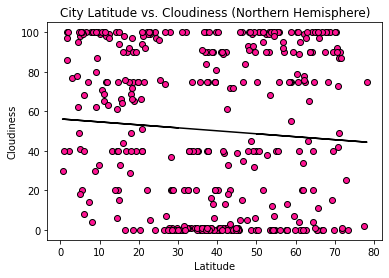

In [79]:
x_values = north_hem_df['Latitude'].astype(float)
y_values = north_hem_df['Cloudiness'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, marker="o", color="deeppink", edgecolor="black")
plt.plot(x_values, regress_values, "r-", color="black")
plt.title("City Latitude vs. Cloudiness (Northern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"R Squared: {rvalue**2}")
print(line_eq)


plt.show()

In [ ]:
#plot showing the linear regression for City Latitude vs. cloudiness in Northern Hemisphere
# R squared value suggests that there is little to no correlation between Cloudiness and Latitude 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Squared: 0.005407269599096896
y = -0.19x + 32.71


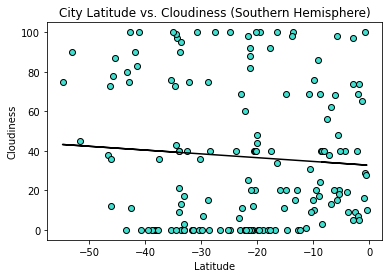

In [81]:
x_values = south_hem_df['Latitude'].astype(float)
y_values = south_hem_df['Cloudiness'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, marker="o", color="turquoise", edgecolor="black")
plt.plot(x_values, regress_values, "r-", color="black")
plt.title("City Latitude vs. Cloudiness (Southern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"R Squared: {rvalue**2}")
print(line_eq)


plt.show()

In [ ]:
#plot showing the linear regression for City Latitude vs. cloudiness in Southern Hemisphere
# R squared value suggests that there is little to no correlation between Cloudiness and Latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Squared: 0.011210964802561221
y = 0.03x + 6.72


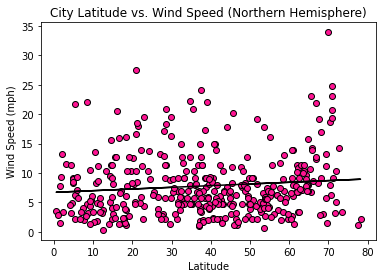

In [83]:
x_values = north_hem_df['Latitude'].astype(float)
y_values = north_hem_df['Wind Speed'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, marker="o", color="deeppink", edgecolor="black")
plt.plot(x_values, regress_values, "r-", color="black")
plt.title("City Latitude vs. Wind Speed (Northern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"R Squared: {rvalue**2}")
print(line_eq)


plt.show()

In [ ]:
#plot showing the linear regression for City Latitude vs. Wind Speed in Northern Hemisphere
# R squared value suggests that there is little to no correlation between Wind Speed and Latitude

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Squared: 0.07385147006013253
y = -0.12x + 5.32


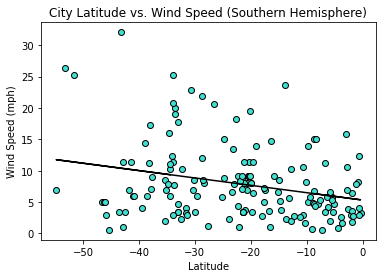

In [84]:
x_values = south_hem_df['Latitude'].astype(float)
y_values = south_hem_df['Wind Speed'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, marker="o", color="turquoise", edgecolor="black")
plt.plot(x_values, regress_values, "r-", color="black")
plt.title("City Latitude vs. Wind Speed (Southern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"R Squared: {rvalue**2}")
print(line_eq)


plt.show()

In [ ]:
#plot showing the linear regression for City Latitude vs. Wind Speed in Southern Hemisphere
# R squared value suggests that there may be a slight correlation between Wind Speed and Latitude